<a href="https://colab.research.google.com/github/siddarthvadr/fashion_mnist_keras/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from functools import partial
np.random.seed(42)
tf.random.set_seed(42)
print('Tensorflow version', tf.__version__)
print('Keras version', keras.__version__)

2023-03-29 23:40:01.411375: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-29 23:40:02.112194: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Tensorflow version 2.12.0
Keras version 2.12.0


In [2]:
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))

2023-03-29 23:40:05.151100: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-03-29 23:40:05.246330: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-03-29 23:40:05.246533: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: NVIDIA GeForce GTX 1660 SUPER, pci bus id: 0000:0a:00.0, compute capability: 7.5



2023-03-29 23:40:05.952586: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-03-29 23:40:05.952800: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-03-29 23:40:05.952955: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
X_train_full.shape

(60000, 28, 28)

Item 0 - 9


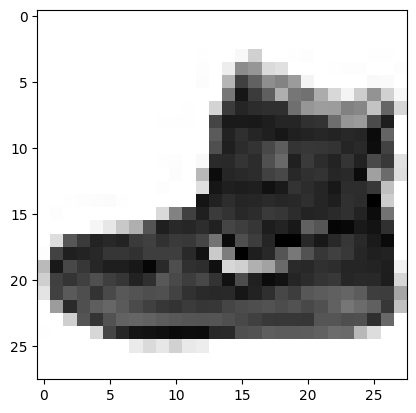

In [5]:
plt.imshow(X_train_full[0], cmap='Greys')
print(f'Item 0 - {y_train_full[0]}')

In [6]:
X_train, X_valid = X_train_full[:55000], X_train_full[55000:]
y_train, y_valid = y_train_full[:55000], y_train_full[55000:]

print(f'Train data shape - {X_train.shape}')
print(f'Validation data shape - {X_valid.shape}')
print(f'Test data shape - {X_test.shape}')

Train data shape - (55000, 28, 28)
Validation data shape - (5000, 28, 28)
Test data shape - (10000, 28, 28)


In [7]:
X_mean = X_train.mean(axis = 0)
X_std = X_train.std(axis = 0)
X_train = (X_train - X_mean) / X_std
X_valid = (X_valid - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

In [8]:
X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [9]:
print ("Shape of features", X_train.shape, X_valid.shape, X_test.shape)


Shape of features (55000, 28, 28, 1) (5000, 28, 28, 1) (10000, 28, 28, 1)


In [10]:
DefaultConv2D = partial(keras.layers.Conv2D, kernel_size=3, activation='relu', padding='SAME')

In [11]:
model = keras.models.Sequential([DefaultConv2D(filters=64, kernel_size=7, input_shape=[28,28,1]),
                                 keras.layers.MaxPooling2D(pool_size=2), 
                                 DefaultConv2D(filters=128),  
                                 DefaultConv2D(filters=128),
                                 keras.layers.MaxPooling2D(pool_size=2),
                                 DefaultConv2D(filters=256),
                                 DefaultConv2D(filters=256),
                                 keras.layers.MaxPooling2D(pool_size=2),
                                 keras.layers.Flatten(),
                                 keras.layers.Dense(units=128, activation='relu'),
                                 keras.layers.Dropout(0.5),
                                 keras.layers.Dense(units=64, activation='relu'),
                                 keras.layers.Dropout(0.5),
                                 keras.layers.Dense(units=10, activation='softmax')])

2023-03-29 23:40:54.387518: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-03-29 23:40:54.388232: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-03-29 23:40:54.388467: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [12]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

In [14]:
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))

Epoch 1/5
1719/1719 [==============================] - 13s 8ms/step - loss: 0.3297 - accuracy: 0.8893 - val_loss: 0.2891 - val_accuracy: 0.8930
Epoch 2/5
1719/1719 [==============================] - 13s 8ms/step - loss: 0.3069 - accuracy: 0.8955 - val_loss: 0.3015 - val_accuracy: 0.8874
Epoch 3/5
1719/1719 [==============================] - 13s 8ms/step - loss: 0.2899 - accuracy: 0.9011 - val_loss: 0.2865 - val_accuracy: 0.8974
Epoch 4/5
1719/1719 [==============================] - 13s 8ms/step - loss: 0.2785 - accuracy: 0.9049 - val_loss: 0.2773 - val_accuracy: 0.9040
Epoch 5/5
1719/1719 [==============================] - 13s 7ms/step - loss: 0.2728 - accuracy: 0.9072 - val_loss: 0.2925 - val_accuracy: 0.9034


In [15]:
results = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2893 - accuracy: 0.8996


In [16]:
print(f'Accuracy = {np.round(results[1]*100, 1)}%')

Accuracy = 90.0%


In [17]:
X_new = X_test[10:20]
y_pred = model.predict(X_new)

1/1 [==============================] - 0s 246ms/step


In [18]:
print(np.argmax(y_pred, axis=1))

[4 5 5 3 4 1 2 6 8 0]


In [19]:
print(y_test[10:20])

[4 5 7 3 4 1 2 4 8 0]
